<a href="https://colab.research.google.com/github/SakumaRyoDev/study_ml/blob/main/two_classes_soft_margin_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification


def create_dataset():
    X, t = make_classification(n_samples=100, n_features=2, n_classes=2,n_redundant=0, random_state=0)
    t = 2 * t - 1  # (0, 1) -> (-1, 1)
    return X, t


def get_free_sv_mask(alpha, C):
    return (alpha > 0) & (alpha < C)


def get_dataset_df(X, t):
    return pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        't': t
    })


def get_line_df(w, b):
    w1, w2 = w
    x1 = [-1, 1]
    x2 = [- (w1 * x + b) / w2 for x in x1]
    return pd.DataFrame({
        'x1': x1,
        'x2': x2,
    })


X, t = create_dataset()
H = (t * t.reshape(-1, 1)) * (X @ X.T)
one = (np.zeros_like(alpha) + 1.0)

alpha = np.zeros(shape=X.shape[0])
beta = 1.0

# hyper params
C = 5
eta_alpha = 1E-3
eta_beta = 1.0

# for visualization
num_free_svs = []

# gradient descent with a squared penalty function
max_iter = 50000
for iter in range(max_iter):
    delta = one - (H @ alpha) - beta * (alpha @ t) * t
    alpha += eta_alpha * delta
    alpha = np.clip(alpha, 0, C)
    beta += eta_beta * (alpha @ t) ** 2 / 2
    if iter % 1000 == 0:
        num_free_svs.append(np.count_nonzero(get_free_sv_mask(alpha, C)))

w = (alpha * t) @ X
mask = get_free_sv_mask(alpha, C)
b = (t[mask] - (X[mask] @ w)).mean()

print(f'w = {w}')
print(f'b = {b}')

w = [2.21955947 0.35886866]
b = 0.6589498870539454


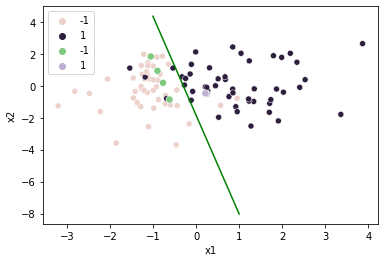

In [319]:
sns.scatterplot(data=get_dataset_df(X, t), x='x1', y='x2', hue='t')
sns.scatterplot(data=get_dataset_df(X[mask], t[mask]), x='x1', y='x2', hue='t', palette='Accent', s=50)
sns.lineplot(data=get_line_df(w, b), x='x1', y='x2', color='green')

[Text(0, 0.5, '# free SV'), Text(0.5, 0, 'x1000 iterations')]

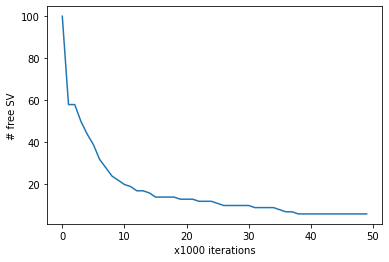

In [320]:
sns.lineplot(data=num_free_svs).set(xlabel='x1000 iterations', ylabel='# free SV')